In [ ]:
# Importing Pandas library for data manipulation and analysis
import pandas as pd

# Importing NumPy library for numerical operations
import numpy as np

# Importing Seaborn for statistical data visualization
import seaborn as sns

# Importing Matplotlib's pyplot module for creating plots
import matplotlib.pyplot as plt

# Importing the CSV module for reading and writing CSV files
import csv

# Importing train_test_split function for splitting datasets
from sklearn.model_selection import train_test_split

# Importing StandardScaler for standardizing features
from sklearn.preprocessing import StandardScaler

# Importing LinearRegression for linear regression
from sklearn.linear_model import LinearRegression


# Importing evaluation metrics for classification models
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

marks = pd.read_csv('/content/drive/MyDrive/marks.csv')
display(marks.describe())

,MID,FINAL,OVERALL
count,277.000000,277.000000,277.000000
mean,13.420578,31.425993,67.122744
std,2.905986,7.652610,10.983490
min,4.000000,7.000000,36.000000
25%,11.500000,26.500000,60.000000
50%,13.500000,32.000000,67.000000
75%,15.500000,37.000000,75.000000
max,19.000000,48.000000,94.000000


In [6]:
import pandas as pd


# Show Data types of each Attribute Here
marks = pd.read_csv('/content/drive/MyDrive/marks.csv')
print(marks.dtypes)

MID        float64
FINAL      float64
OVERALL      int64
dtype: object


In [3]:
import pandas as pd

marks = pd.read_csv('/content/drive/MyDrive/marks.csv')

# Show value count of each Attribute Here
for column in marks.columns:
    print(marks[column].value_counts())

MID
14.0    26
13.5    24
11.5    19
15.0    18
16.0    17
17.5    17
9.5     15
12.0    14
17.0    13
14.5    13
12.5    13
16.5    12
10.5    12
11.0    12
15.5    10
13.0     8
10.0     5
18.5     5
7.5      5
18.0     4
9.0      3
8.5      3
6.5      2
8.0      2
4.0      1
6.0      1
7.0      1
4.5      1
19.0     1
Name: count, dtype: int64
FINAL
28.0    13
32.0    12
29.0     9
24.0     9
33.0     9
        ..
47.0     1
7.0      1
15.5     1
15.0     1
45.0     1
Name: count, Length: 62, dtype: int64
OVERALL
60    27
80    16
72    15
53    15
66    13
68    13
63    11
67    11
70    11
61    10
75     9
69     8
74     8
81     8
62     7
84     7
73     7
55     6
77     6
76     6
50     6
89     5
56     5
54     5
78     4
87     4
57     3
51     3
88     3
65     3
52     3
64     2
82     2
83     2
58     2
39     1
38     1
59     1
42     1
45     1
94     1
37     1
36     1
46     1
43     1
71     1
Name: count, dtype: int64


In [ ]:
display(marks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MID      277 non-null    float64
 1   FINAL    277 non-null    float64
 2   OVERALL  277 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.6 KB


None

In [4]:
print(marks.head())

    MID  FINAL  OVERALL
0  15.0   28.5       66
1   7.0   23.0       50
2  13.5   37.5       73
3  14.0   27.0       62
4  16.0   25.0       60


In [5]:
print(marks.tail())

      MID  FINAL  OVERALL
272  12.5   30.5       61
273  17.0   38.0       77
274  18.5   43.0       84
275  17.5   25.0       61
276  18.0   36.5       76


<Axes: xlabel='MID', ylabel='FINAL'>

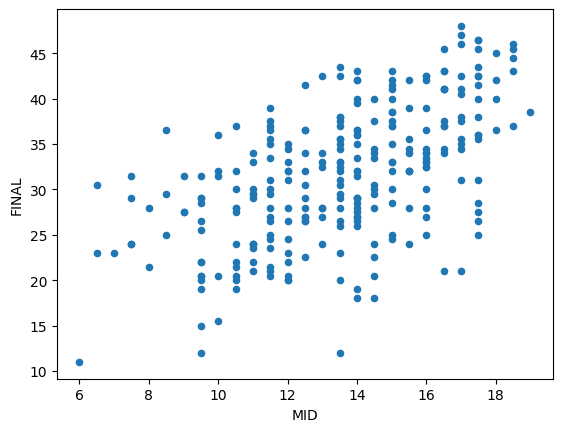

In [ ]:
marks.plot.scatter('MID', 'FINAL')

<Axes: xlabel='MID', ylabel='OVERALL'>

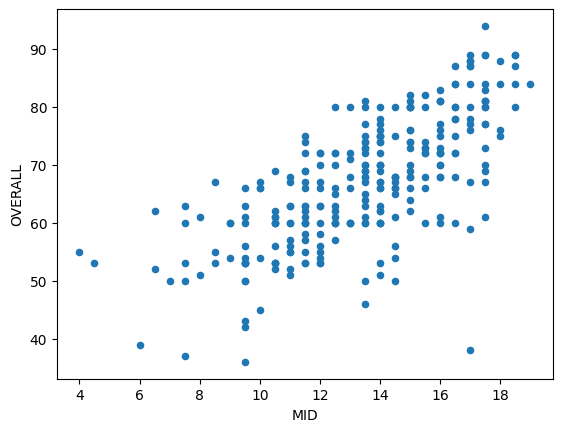

In [ ]:
marks.plot.scatter('MID', 'OVERALL')

In [ ]:
corr = marks.corr()
corr.style.background_gradient()

,MID,FINAL,OVERALL
MID,1.000000,0.576001,0.707171
FINAL,0.576001,1.000000,0.938598
OVERALL,0.707171,0.938598,1.000000


In [ ]:
styled_corr = corr.style.background_gradient(cmap='coolwarm')
display(styled_corr)

,MID,FINAL,OVERALL
MID,1.000000,0.576001,0.707171
FINAL,0.576001,1.000000,0.938598
OVERALL,0.707171,0.938598,1.000000


In [ ]:
X = marks['MID'].values.reshape(
    -1, 1)  #reshape is done to ensure the correct sizes.
y = marks['FINAL'].values

print(X.shape)

(273, 1)


Dividing it into training and testing data. 75% training and 25% testing. Using (random) seed as 42

In [ ]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)
# Predict
y_predicted = regression_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('beta (slope):', regression_model.coef_)
print('alpha (intercept):', regression_model.intercept_)
print('Mean squared error: ', mse)
print('Root mean squared error: ', mse**(1 / 2.0))
print('R2 score: ', r2)

beta (slope): [1.54367815]
alpha (intercept): 10.589886374707717
Mean squared error:  36.67571014215223
Root mean squared error:  6.056047402568133
R2 score:  0.30871775549288083


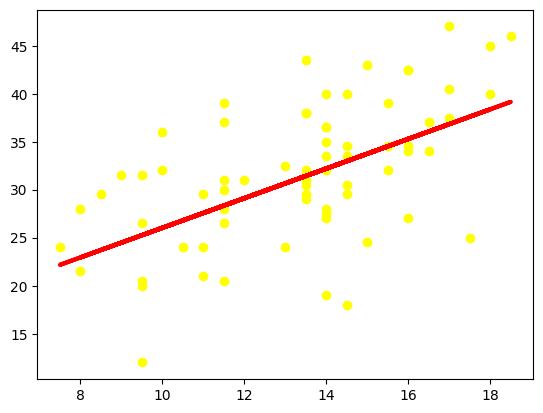

In [ ]:
# Plot outputs
import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, color="yellow")
plt.plot(x_test, y_predicted, color="red", linewidth=3)

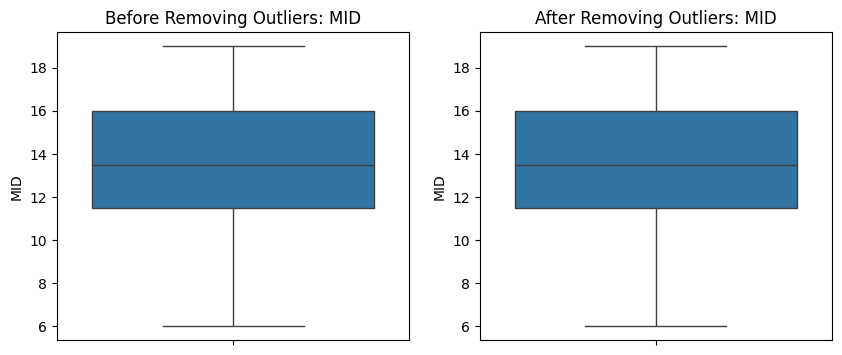

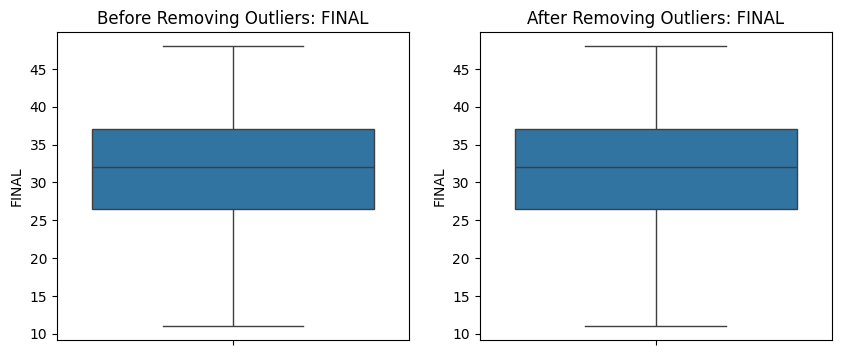

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to remove outliers
def remove_outliers(marks, column):
    Q1 = marks[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = marks[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound to identify outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound to identify outliers
    return marks[(marks[column] >= lower_bound) & (marks[column] <= upper_bound)]  # Data without outliers

# Loop through each numeric column to visualize data before and after removing outliers
for column in marks.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 4))

    # Boxplot before removing outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(marks[column])
    plt.title(f'Before Removing Outliers: {column}')

    # Remove outliers
    marks = remove_outliers(marks, column)

    # Boxplot after removing outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(marks[column])
    plt.title(f'After Removing Outliers: {column}')

    plt.show()


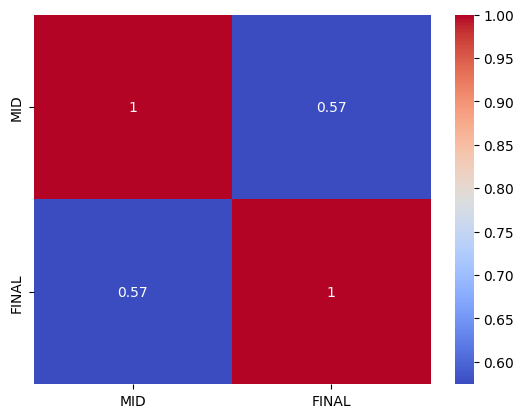

    MID  FINAL
0  15.0   28.5
1   7.0   23.0
2  13.5   37.5
3  14.0   27.0
4  16.0   25.0
            MID     FINAL
MID    1.000000  0.573906
FINAL  0.573906  1.000000
    MID  FINAL
0  15.0   28.5
1   7.0   23.0
2  13.5   37.5
3  14.0   27.0
4  16.0   25.0


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'marks' is your DataFrame

# Filter out non-float columns
float_marks = marks.select_dtypes(include=['float64'])

# Compute the correlation matrix
corr = float_marks.corr()

# Display the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Display the first few rows of the DataFrame to help identify column names
print(marks.head())

# Display the correlation matrix to help identify potential dependent and independent variables
print(corr)

# Replace 'Total' and 'Final Exam' with actual column names identified from your heatmap
independent_variable = 'MID'  # Replace with actual column name
dependent_variable = 'FINAL'  # Replace with actual column name

# Selecting the independent and dependent variables
X = float_marks[[independent_variable]]  # Independent variable(s)
y = float_marks[dependent_variable]  # Dependent variable

# Combine X and y into a single DataFrame for visualization
marks = pd.DataFrame({independent_variable: X[independent_variable], dependent_variable: y})

print(marks.head())


